In [1]:
import os
import cv2
import torch
import random
import numpy as np

from torch import nn
from ultralytics import YOLO
import matplotlib.pyplot as plt

import pandas as pd


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
dataset_dir = "dataset"
train_dir = "dataset/train"
val_dir = "dataset/val"

train_classes = [x for x in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, x))]
val_classes = [x for x in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, x))]

print(f"Классы в train: {len(train_classes)} -> {train_classes}")
print(f"Классы в val: {len(val_classes)} -> {val_classes}")

Классы в train: 32 -> ['Apple', 'Avocado', 'Banana', 'Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Cucumber', 'Grape', 'Kiwi', 'Mango', 'Nut', 'Onion', 'Orange', 'Papaya', 'Peach', 'Pear', 'Pepper', 'Pinenapple', 'Plum', 'Potato', 'Pumpkin', 'Radish', 'Strawberry', 'Tomato', 'Watermelon']
Классы в val: 32 -> ['Apple', 'Avocado', 'Banana', 'Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Cucumber', 'Grape', 'Kiwi', 'Mango', 'Nut', 'Onion', 'Orange', 'Papaya', 'Peach', 'Pear', 'Pepper', 'Pinenapple', 'Plum', 'Potato', 'Pumpkin', 'Radish', 'Strawberry', 'Tomato', 'Watermelon']


Создам модель yolo и получу из нее слой головы, чтобы попробовать туда добавить dropout

In [3]:
model_config_path = "yolo11n-cls.pt"
model = YOLO(model_config_path, task="classify")
model.to(device)
try:
    results = model.train(
        model=model_config_path,
        data=dataset_dir,
        epochs=100,
        batch=16,
        imgsz=128,
        optimizer="AdamW",
        lr0=1e-3,
        save=True,
        seed=42,
        plots=True,
        cos_lr=True,
        patience=12,
        verbose=True,
    )
except Exception as e:
    print(e)

New https://pypi.org/project/ultralytics/8.3.151 available  Update with 'pip install -U ultralytics'
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train18, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=12, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning D:\code\dl_proj\dataset\train... 40050 images, 0 corrupt: 100%|██████████| 40050/40050 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 24.411.9 MB/s, size: 4.2 KB)


val: Scanning D:\code\dl_proj\dataset\val... 8960 images, 0 corrupt: 100%|██████████| 8960/8960 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to runs\classify\train18
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.461G     0.9817          2        128: 100%|██████████| 2504/2504 [01:35<00:00, 26.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:03<00:00, 92.17it/s]

                   all      0.898       0.99



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.461G     0.5034          2        128: 100%|██████████| 2504/2504 [01:20<00:00, 31.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 94.70it/s]

                   all      0.954      0.996



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.461G      0.401          2        128: 100%|██████████| 2504/2504 [01:16<00:00, 32.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.68it/s] 

                   all      0.965      0.996



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.461G     0.3489          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.25it/s] 

                   all      0.971      0.997



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.461G     0.2951          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.66it/s]

                   all      0.975      0.997



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.461G      0.262          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.61it/s] 

                   all      0.981      0.997



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.461G     0.2335          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.59it/s]

                   all      0.983      0.998



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.461G     0.2165          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.80it/s] 

                   all      0.984      0.998



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.461G     0.2039          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.28it/s] 

                   all      0.983      0.998



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.461G     0.1845          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.97it/s] 

                   all      0.986      0.998



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.461G     0.1672          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 95.83it/s] 

                   all       0.99      0.998



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.461G     0.1631          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.05it/s] 

                   all      0.988      0.997



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.461G     0.1553          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.80it/s] 

                   all      0.988      0.998



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.461G     0.1531          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.23it/s] 

                   all      0.989      0.998



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.461G     0.1364          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.69it/s]

                   all       0.99      0.998



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.461G     0.1359          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.02it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.461G     0.1329          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 95.96it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.461G     0.1199          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.52it/s] 

                   all      0.989      0.998



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.461G     0.1213          2        128: 100%|██████████| 2504/2504 [01:15<00:00, 33.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.94it/s] 

                   all       0.99      0.998



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.461G     0.1154          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.03it/s] 

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.461G     0.1042          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.20it/s] 

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.461G     0.1059          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.06it/s] 

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.461G     0.1004          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 33.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.20it/s] 

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.461G    0.09331          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.50it/s] 

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.461G    0.09705          2        128: 100%|██████████| 2504/2504 [01:15<00:00, 33.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.34it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.461G    0.09279          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 95.58it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.461G    0.08272          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.26it/s] 

                   all      0.992      0.998



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.461G     0.0849          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.82it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.461G    0.07864          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.54it/s] 

                   all      0.992      0.999

      Epoch    GPU_mem       loss  Instances       Size



     30/100     0.461G    0.07884          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.73it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.461G     0.0774          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.88it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.461G    0.07544          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.19it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.461G     0.0687          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 33.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.66it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.461G    0.07492          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 33.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 98.80it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.461G    0.06399          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.12it/s] 

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.461G    0.06274          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 33.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.67it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.461G    0.06376          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 96.06it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.461G    0.05873          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 97.56it/s] 

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.461G    0.05494          2        128: 100%|██████████| 2504/2504 [01:15<00:00, 33.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 94.25it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.461G    0.05753          2        128: 100%|██████████| 2504/2504 [01:15<00:00, 33.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 94.52it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.461G    0.05252          2        128: 100%|██████████| 2504/2504 [01:15<00:00, 33.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:03<00:00, 92.91it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.461G    0.05272          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:03<00:00, 92.16it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.461G    0.04732          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:03<00:00, 92.53it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.461G    0.04476          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 93.51it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.461G    0.04391          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 93.57it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.461G    0.04912          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 94.63it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.461G    0.04593          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 94.28it/s]

                   all      0.992      0.999
EarlyStopping: Training stopped early as no improvement observed in last 12 epochs. Best results observed at epoch 35, best model saved as best.pt.
To update EarlyStopping(patience=12) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 1.020 hours.
Optimizer stripped from runs\classify\train18\weights\last.pt, 3.3MB
Optimizer stripped from runs\classify\train18\weights\best.pt, 3.3MB

Validating runs\classify\train18\weights\best.pt...
Ultralytics 8.3.150  Python-3.12.0 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
YOLO11n-cls summary (fused): 47 layers, 1,567,016 parameters, 0 gradients, 3.2 GFLOPs
train: D:\code\dl_proj\dataset\train... found 40050 images in 32 classes  
val: D:\code\dl_proj\dataset\val... found 8960 images in 32 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 122.75it/s]


                   all      0.992      0.999
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train18


In [4]:
model_config_path = "yolo11n-cls.pt"
model = YOLO(model_config_path, task="classify")
model.to(device)

sequential_model = model.model.model

current_head = sequential_model[-1]

in_features = current_head.linear.in_features
out_features = len(train_classes)

new_head = nn.Sequential(
    current_head.conv,
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Dropout(p=0.3, inplace=False),
    nn.Linear(in_features=in_features, out_features=out_features, bias=True),
)

new_head[0].conv.weight.data = current_head.conv.conv.weight.data.clone()
new_head[0].bn.weight.data = current_head.conv.bn.weight.data.clone()
new_head[0].bn.bias.data = current_head.conv.bn.bias.data.clone()
new_head[0].bn.running_mean.data = current_head.conv.bn.running_mean.data.clone()
new_head[0].bn.running_var.data = current_head.conv.bn.running_var.data.clone()
new_head[-1].weight.data = current_head.linear.weight.data.clone()
new_head[-1].bias.data = current_head.linear.bias.data.clone()

sequential_model[-1] = new_head

model.save("modified_yolo11n-cls.pt")

In [5]:
model_config_path = "modified_yolo11n-cls.pt"
model2 = YOLO(model_config_path, task="classify")
model2.to(device)
try:
    results = model2.train(
        model=model_config_path,
        data=dataset_dir,
        epochs=100,
        batch=16,
        imgsz=128,
        optimizer="AdamW",
        lr0=1e-3,
        save=True,
        seed=42,
        plots=True,
        cos_lr=True,
        patience=12,
        verbose=True,
    )
except Exception as e:
    print(e)

New https://pypi.org/project/ultralytics/8.3.151 available  Update with 'pip install -U ultralytics'
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=modified_yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train17, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=12, perspective=0.0, plots=True, pose=12.

train: Scanning D:\code\dl_proj\dataset\train... 40050 images, 0 corrupt: 100%|██████████| 40050/40050 [00:06<00:00, 5865.04it/s]


train: New cache created: D:\code\dl_proj\dataset\train.cache
val: Fast image access  (ping: 0.30.7 ms, read: 4.32.3 MB/s, size: 4.2 KB)


val: Scanning D:\code\dl_proj\dataset\val... 8960 images, 0 corrupt: 100%|██████████| 8960/8960 [00:01<00:00, 5837.14it/s]

val: New cache created: D:\code\dl_proj\dataset\val.cache


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to runs\classify\train17
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.195G      1.227          2        128: 100%|██████████| 2504/2504 [01:29<00:00, 28.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 101.16it/s]

                   all      0.814      0.976



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.203G     0.6002          2        128: 100%|██████████| 2504/2504 [01:17<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.20it/s]

                   all       0.94      0.994



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.213G     0.4385          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 34.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 102.82it/s]

                   all      0.963      0.996



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.223G     0.3629          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.63it/s]

                   all      0.971      0.997



      Epoch    GPU_mem       loss  Instances       Size


      5/100      0.23G     0.3007          2        128: 100%|██████████| 2504/2504 [01:10<00:00, 35.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.39it/s]

                   all      0.972      0.997



      Epoch    GPU_mem       loss  Instances       Size


      6/100      0.24G     0.2731          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 107.60it/s]

                   all      0.979      0.998



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.248G     0.2473          2        128: 100%|██████████| 2504/2504 [01:10<00:00, 35.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.39it/s]

                   all       0.98      0.998



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.258G     0.2176          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.00it/s]

                   all      0.984      0.997



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.266G     0.2139          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.18it/s]

                   all      0.986      0.998



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.275G     0.1937          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.65it/s]

                   all      0.987      0.998



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.285G      0.183          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.82it/s]

                   all      0.987      0.998



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.293G     0.1745          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 34.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.58it/s]

                   all      0.988      0.998



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.303G     0.1653          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.01it/s]

                   all      0.987      0.998



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.311G     0.1582          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 34.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.89it/s]

                   all      0.988      0.998



      Epoch    GPU_mem       loss  Instances       Size


     15/100      0.32G     0.1561          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.81it/s]

                   all      0.989      0.998



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.328G     0.1313          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.70it/s]

                   all       0.99      0.998



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.338G     0.1396          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.28it/s]

                   all       0.99      0.999

      Epoch    GPU_mem       loss  Instances       Size



     18/100     0.346G     0.1281          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.94it/s]

                   all      0.989      0.998



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.355G     0.1298          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.27it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.365G     0.1157          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.90it/s]

                   all      0.989      0.999



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.373G     0.1159          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.72it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.383G     0.1076          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.50it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.391G     0.1098          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.42it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     24/100       0.4G    0.09598          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.68it/s]

                   all       0.99      0.998



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.408G      0.106          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 102.75it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.418G     0.0972          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.91it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.428G    0.09149          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.86it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.436G    0.09128          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.56it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.445G    0.08916          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.19it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.453G    0.08323          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.84it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.463G    0.08736          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 102.63it/s]


                   all       0.99      0.999

      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.471G    0.07768          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.30it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


     33/100      0.48G    0.07507          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.44it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.488G    0.07817          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 102.07it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.498G    0.06788          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.12it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.508G    0.07156          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 33.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 100.35it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.516G     0.0687          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.66it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.525G    0.06322          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.90it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.533G    0.06079          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.00it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.543G    0.06233          2        128: 100%|██████████| 2504/2504 [01:12<00:00, 34.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.84it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.551G    0.05767          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.63it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.561G    0.05813          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.52it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     43/100      0.57G     0.0511          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.03it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.578G    0.05579          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.46it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.588G    0.05138          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.19it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.596G     0.0476          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.82it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.605G    0.04921          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 106.93it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.613G    0.04655          2        128: 100%|██████████| 2504/2504 [01:12<00:00, 34.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 101.22it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.623G     0.0463          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.10it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.633G    0.04159          2        128: 100%|██████████| 2504/2504 [01:14<00:00, 33.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.75it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.641G    0.04123          2        128: 100%|██████████| 2504/2504 [01:13<00:00, 34.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.99it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     52/100      0.65G    0.04189          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.63it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.658G    0.03793          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.34it/s]

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.668G    0.04115          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 107.07it/s]

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.676G    0.03572          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 104.42it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.686G    0.03554          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.07it/s]

                   all      0.991      0.998



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.693G    0.03535          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.43it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.703G    0.03247          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 35.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.13it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.713G     0.0316          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 101.54it/s]


                   all      0.991      0.999

      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.721G    0.03115          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 101.55it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     61/100      0.73G    0.02771          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 103.58it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.738G    0.02851          2        128: 100%|██████████| 2504/2504 [01:11<00:00, 34.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 105.41it/s]

                   all      0.991      0.999
EarlyStopping: Training stopped early as no improvement observed in last 12 epochs. Best results observed at epoch 50, best model saved as best.pt.
To update EarlyStopping(patience=12) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



62 epochs completed in 1.290 hours.
Optimizer stripped from runs\classify\train17\weights\last.pt, 3.3MB
Optimizer stripped from runs\classify\train17\weights\best.pt, 3.3MB

Validating runs\classify\train17\weights\best.pt...
Ultralytics 8.3.150  Python-3.12.0 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
YOLO11n-cls summary (fused): 47 layers, 1,567,016 parameters, 0 gradients, 3.2 GFLOPs
train: D:\code\dl_proj\dataset\train... found 40050 images in 32 classes  
val: D:\code\dl_proj\dataset\val... found 8960 images in 32 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 280/280 [00:02<00:00, 134.36it/s]


                   all      0.991      0.999
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train17


Сделаю предсказания и выведу результаты

In [7]:
img_val_path = "D:/code/dl_proj/dataset/val"
class_folders = [f for f in os.listdir(img_val_path)]
selected_img_path = []
for class_folder in class_folders:
    class_path = os.path.join(img_val_path, class_folder)
    count = 0
    for file in random.sample(os.listdir(class_path), 1):
        selected_img_path.append(os.path.join(class_path, file))
        count += 1
        if count == 3:
            break

In [8]:
%matplotlib inline


def show_result(current_model):
    num_img = len(selected_img_path)
    cols = 6

    rows = int(np.ceil(num_img / cols))
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(selected_img_path, 1):
        results = current_model(img_path, verbose=False)
        img = results[0].plot()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

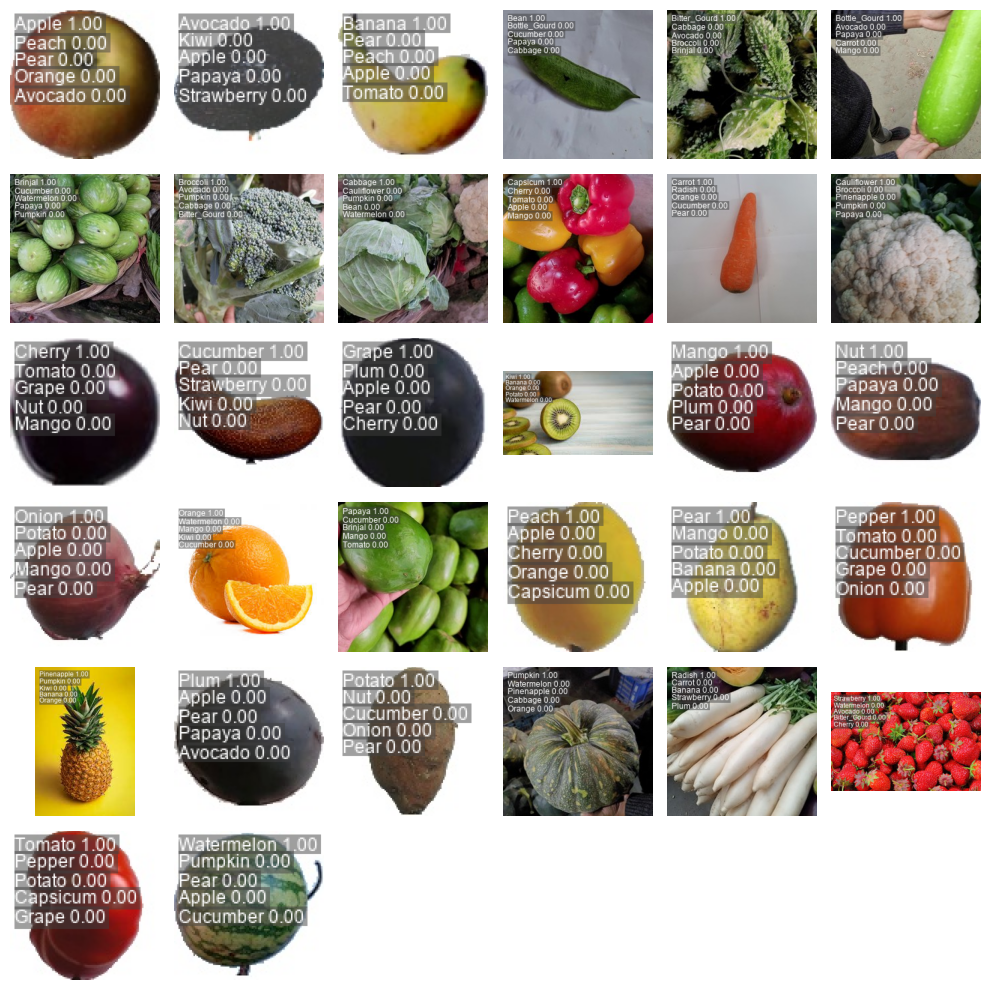

In [9]:
show_result(model)

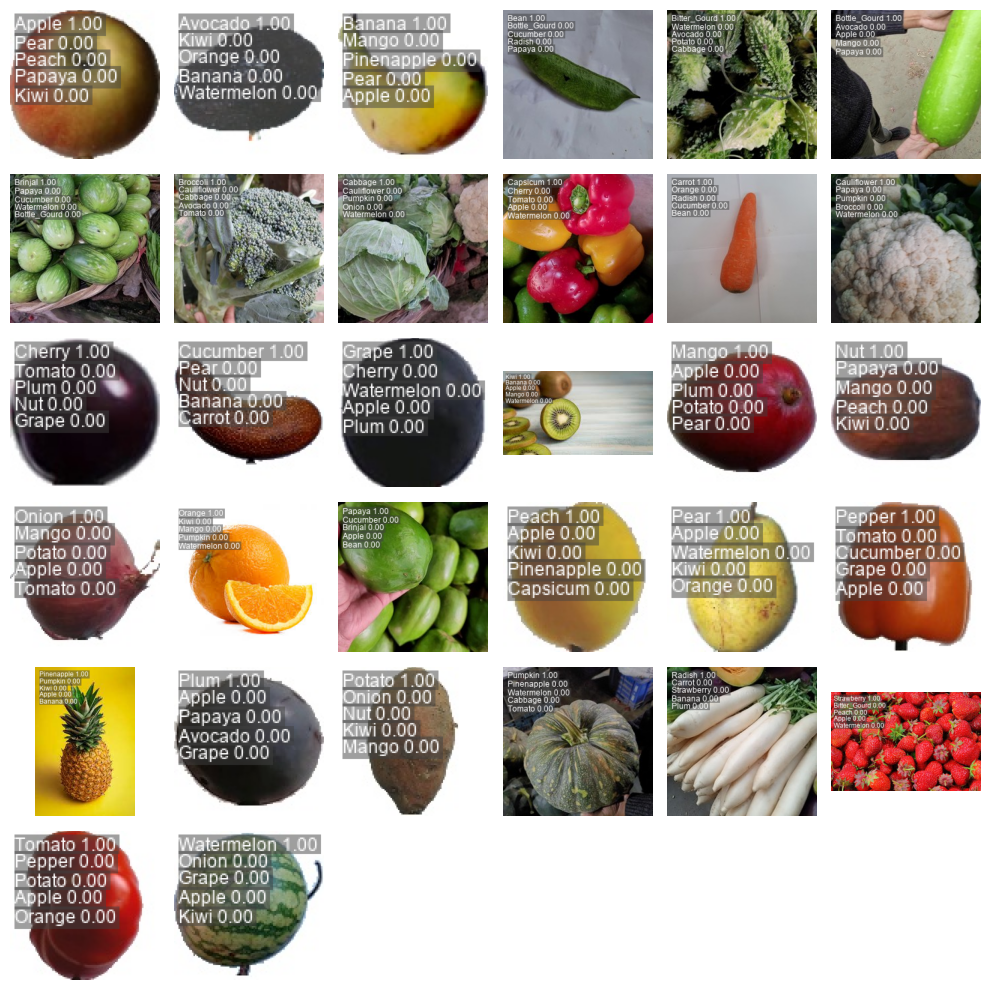

In [10]:
show_result(model2)

In [11]:
%matplotlib inline


def show_loss(df):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(df["epoch"], df["train/loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Losses")

    plt.subplot(1, 2, 2)
    plt.plot(df["epoch"], df["val/loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Losses")

    plt.tight_layout()
    plt.show()

In [12]:
%matplotlib inline


def show_metrics(df):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(df["epoch"], df["metrics/accuracy_top1"])
    plt.xlabel("Epoch")
    plt.ylabel("acc")
    plt.title("Accuracy_top1")

    plt.subplot(1, 2, 2)
    plt.plot(df["epoch"], df["metrics/accuracy_top5"])
    plt.xlabel("Epoch")
    plt.ylabel("acc")
    plt.title("Accuracy_top5")

    plt.tight_layout()
    plt.show()

In [13]:
results_path_modified_model = "runs/classify/train17/results.csv"
results_path_model = "runs/classify/train18/results.csv"

df_modified_model = pd.read_csv(results_path_modified_model)  # модель yolo после добавления слоя dropout
df_model = pd.read_csv(results_path_model)  # модель yolo до изменений

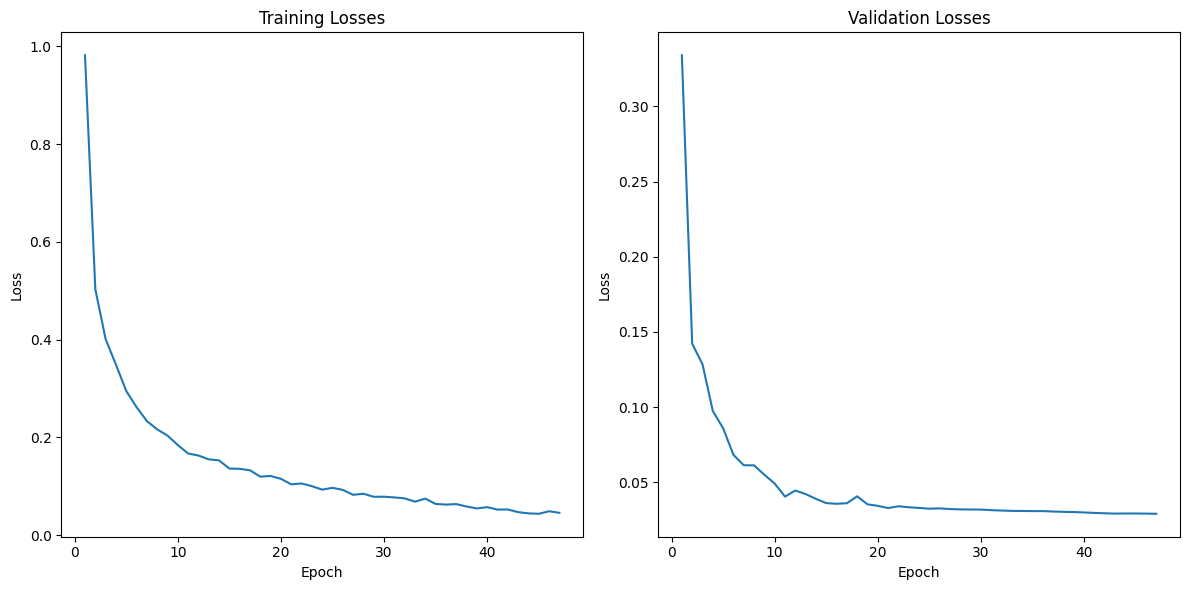

In [14]:
show_loss(df_model)

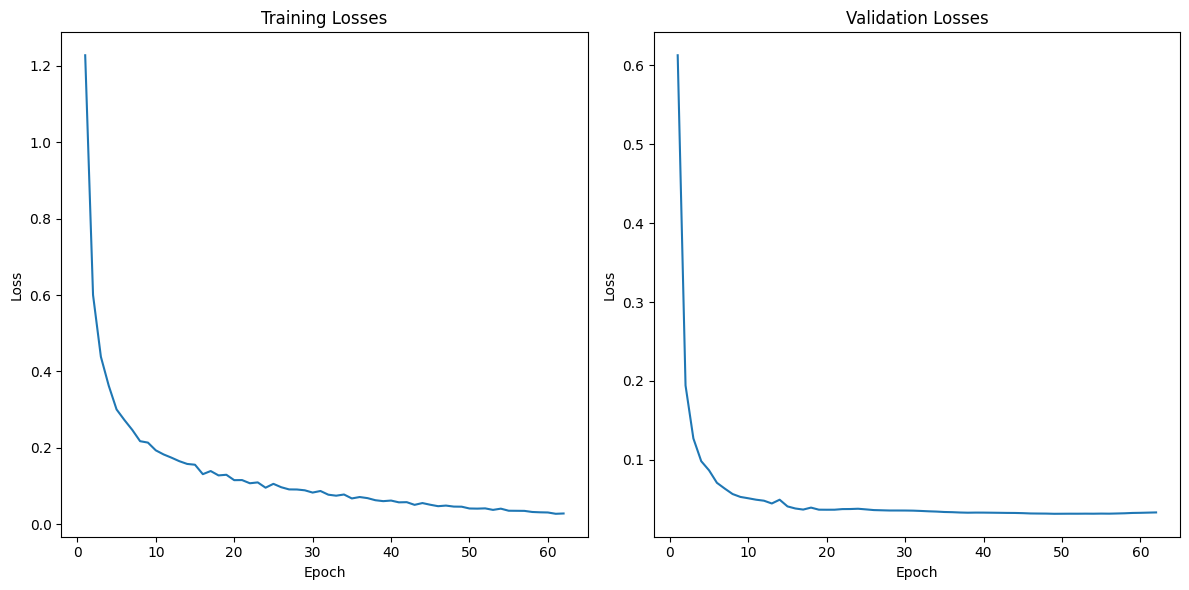

In [15]:
show_loss(df_modified_model)

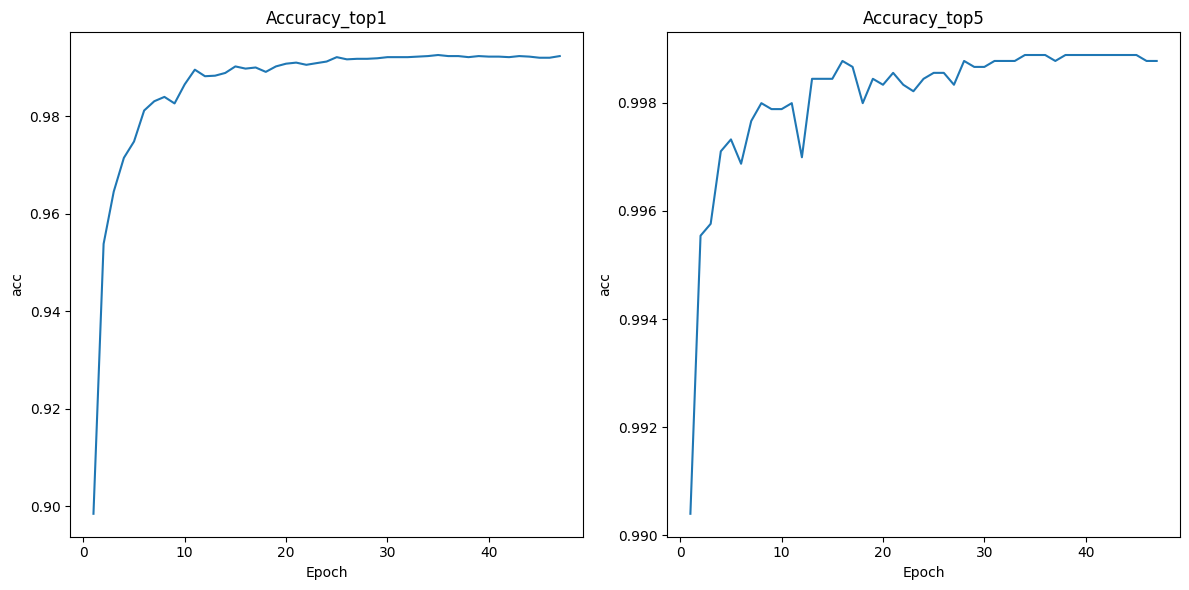

In [16]:
show_metrics(df_model)

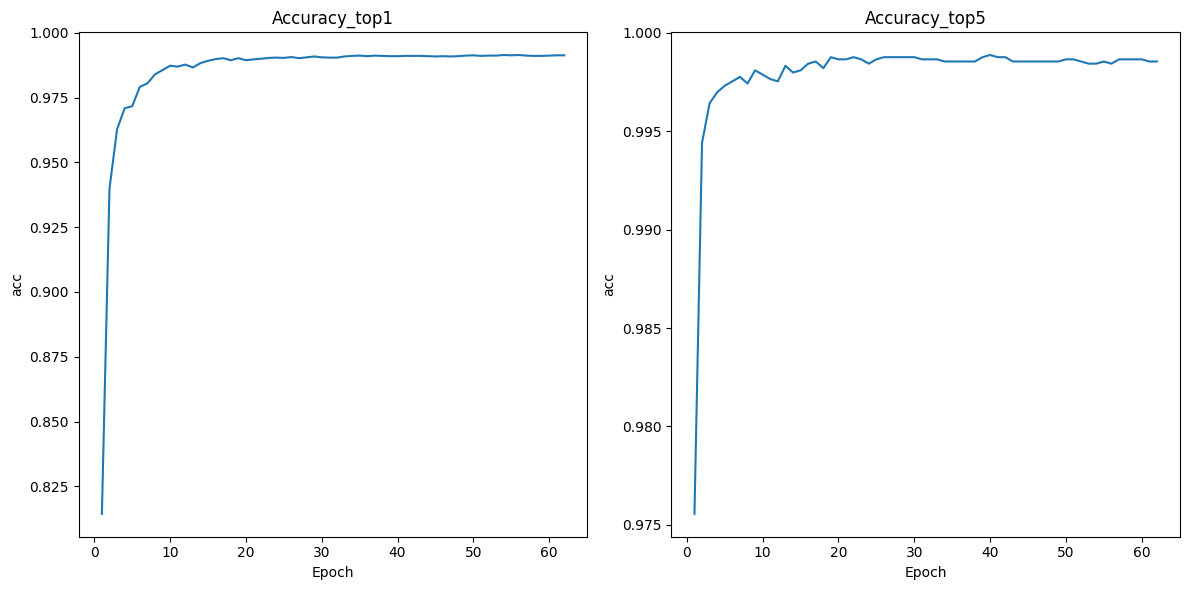

In [17]:
show_metrics(df_modified_model)

**Вывод:**

Была использована модель yolo11 с весами самой легкой модели для классификации yolo11n_cls.pt. В голову модели был внедрен слой dropout и проведен сравнительный анализ между базовой моделью и измененной моделью. Полученный результаты оказались очень схожими:

у базовой модели на валидации:

- loss = 0.04593
- acc = 0.992

у модифицированной модели на валидации:

- loss =  0.02851
- acc = 0.991

У модифицированной модели loss оказался получше.